In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

import os
i = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        i+=1
        if i == 4:
            break
    if i == 4:
        break    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/doodle-dataset/master_doodle_dataframe.csv
/kaggle/input/doodle-dataset/doodle/fan/5145146800734208.png
/kaggle/input/doodle-dataset/doodle/fan/6319036524658688.png
/kaggle/input/doodle-dataset/doodle/fan/4788222250975232.png


# **Exploratory data analysis**

In [2]:
path_to_csv = "/kaggle/input/doodle-dataset/master_doodle_dataframe.csv"
whole_df = pd.read_csv(path_to_csv)

In [3]:
whole_df.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,RO,"[[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...",5613582005829632,True,traffic light,data/traffic light/5613582005829632.png
1,US,"[[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...",5769631006457856,True,traffic light,data/traffic light/5769631006457856.png
2,ZA,"[[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...",4999795544424448,True,traffic light,data/traffic light/4999795544424448.png
3,VN,"[[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...",4878417906368512,True,traffic light,data/traffic light/4878417906368512.png
4,HU,"[[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...",5572841187573760,True,traffic light,data/traffic light/5572841187573760.png


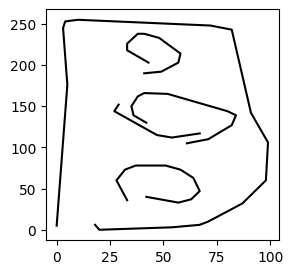

In [4]:
# The drawing format is: within a list, each stroke is represented as a list of x coordinates and a list of y coordinates
data = [
    [[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71, 67, 54, 20, 18], [5, 176, 245, 253, 255, 248, 243, 142, 106, 60, 32, 10, 6, 3, 0, 6]],
    [[33, 28, 32, 37, 51, 58, 64, 67, 63, 57, 42], [36, 60, 73, 78, 78, 73, 63, 47, 37, 33, 40]],
    [[42, 36, 35, 38, 41, 52, 80, 84, 82, 71, 61], [130, 139, 150, 162, 166, 165, 144, 139, 127, 110, 105]],
    [[67, 54, 47, 27, 29], [117, 112, 115, 144, 152]],
    [[43, 33, 33, 38, 41, 48, 58, 57, 49, 41], [203, 218, 226, 238, 238, 233, 214, 203, 192, 190]]
]

# Create a new figure
plt.figure(figsize = (3,3))

# Iterate through each line in the data
for line in data:
    x_coords, y_coords = line # breaks down the line into an array of x's and array od y's
    plt.plot(x_coords, y_coords, color='black')
    
# Display the plot
plt.show()

In [5]:
df_length = len(whole_df)
df_length

1020000

In [6]:
# We can see the recognized column does not add any valuable input
whole_df["recognized"].unique()

array([ True])

## Seeing the distribution of country codes

In [7]:
coutry_codes = whole_df["countrycode"].value_counts()

In [8]:
n=50
doodled_covered_by_n = coutry_codes.head(n).sum()

print(f"The top {n} country codes cover about {round(doodled_covered_by_n/df_length,3)}% of the dataset doodles")

top_countries = coutry_codes.head(n).index

The top 50 country codes cover about 0.962% of the dataset doodles


## Seeing the distribution of the doodled object

In [9]:
words = whole_df["word"].value_counts()

In [10]:
n=50
doodled_covered_by_n = words.head(n).sum()

print(f"The top {n} doodled objects cover about {round(doodled_covered_by_n/df_length,3)}% of the dataset doodles")

top_words = words.head(n).index

The top 50 doodled objects cover about 0.147% of the dataset doodles


# **Trimming down the data**

The dataset contains 1,019,868 doodles of 340 unique categories drown by people from 198 different countries.
Working with these sizes is, at least in this early stage, not desired and might make for a model that will have a hard time capuring the relationship between the data and the labels.

The dataset will be sized down to 144,171 images of 50 categories and 50 country codes.
</br>
We might be able to work with this, instead.

In [11]:
df = whole_df.loc[whole_df['countrycode'].isin(top_countries) & whole_df['word'].isin(top_words)]
df.drop("recognized", axis=1, inplace=True)

We'll end up disregarding the countrycode feature as well, despite the possibility of it proving useful.
</br>
This is because incorporating additional non-photo data would require a much more complex model.

More on that [here](https://stackoverflow.com/questions/52802678/i-have-an-image-data-and-metadata-containing-the-description-of-the-image-how-c).

In [12]:
df.drop("countrycode", axis=1, inplace=True)

As one might imagine, loading many photos onto the memory and converting them into an array is a long process.


[Here](https://medium.com/@laassairi.abdellah/image-loading-benchmark-fastest-way-to-load-large-images-from-disk-into-gpu-e92cee4ca585) is a helpful post comparing different tools for this purpose.

In [13]:
def png_to_ndarry(path):
    img= Image.open(path)
    np_img = np.array(img)
    return np_img

In [29]:
list_A = df["word"].to_list()
print(list_A[:4])

['traffic light', 'traffic light', 'traffic light', 'traffic light']


# **Creating the train, test Datasets and Dataloaders**

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# To be able to send the labels to the GPU, they need to have a method that Tensors have, but lists do not.
# A tensor cannot contain strings, so the list of labels needs to n=be transformed to a tensor of integers.

labels_numeric = label_encoder.fit_transform(df["word"])
y = torch.tensor(labels_numeric, dtype=torch.long)

X_source = df["image_path"].to_list()
X_source = [string.replace("data", "/kaggle/input/doodle-dataset/doodle") for string in X_source]


In [32]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

class PNGDataset(Dataset):
    def __init__(self, image_paths, image_labels, transform=None):
        self.image_paths = image_paths
        self.image_labels = image_labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)
        
        label = self.image_labels[idx]
        
        return image, label


transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor and normalize to [0, 1]
])
dataset = PNGDataset(image_paths=X_source, image_labels=y, transform=transform)

# Split the dataset into training and testing sets
dataset_size    = len(dataset)
train_size      = int(0.7 * dataset_size)   # 80% for training
validation_size = int(0.15 * dataset_size)  # 15% for validation
test_size       = dataset_size - train_size - validation_size  # 15% for testing
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

# Create DataLoaders for training and testing sets
train_loader      = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader       = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# **Building the model**

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)  # Output: 16 x 255 x 255
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)  # Output: 32 x 127 x 127
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)  # Output: 64 x 63 x 63
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 31 * 31, 500)
        self.fc2 = nn.Linear(500, 50)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Output: 16 x 127 x 127
        x = self.pool(F.relu(self.conv2(x)))  # Output: 32 x 63 x 63
        x = self.pool(F.relu(self.conv3(x)))  # Output: 64 x 31 x 31
        x = x.view(-1, 64 * 31 * 31)  # Output: 64*31*31
        x = F.relu(self.fc1(x))  # Output: 500
        x = self.fc2(x)  # Output: 50
        return x

# Instantiate the model, define the loss function and the optimizer
model = BasicCNN().to('cuda')
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model) # Share the load between multiple GPU's
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 3
best_loss = float('inf')
trigger_times = 0

# **Training the model using the DataLoader**

In [41]:
import time

Epoch 1/10, Training Loss: 3.912
Epoch 1/10, Validation Loss: 3.912, Accuracy: 1.924%
Epoch 1 finished at: 3.359 minutes
Early stopping trigger times: 2/3
Epoch 2/10, Training Loss: 3.912
Epoch 2/10, Validation Loss: 3.912, Accuracy: 1.906%
Epoch 2 finished at: 6.726 minutes
Early stopping trigger times: 3/3
Early stopping!
Finished Training in 6.726 minutes


NameError: name 'test_losses' is not defined

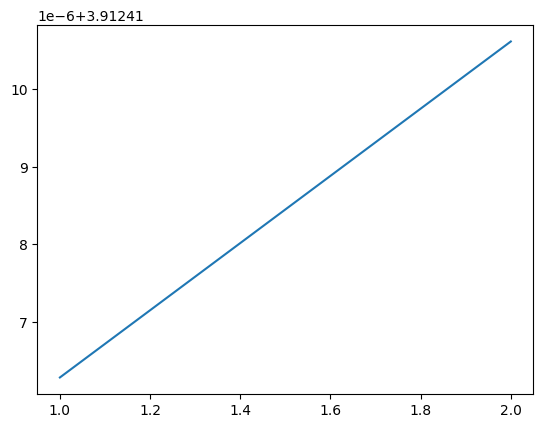

In [45]:
# Lists to store losses for plotting
train_losses = []
validation_losses = []

# Training loop
num_epochs = 10  # Number of epochs to train the model

start = time.time()

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {round(train_loss ,3)}')

    # Evaluation loop
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    validation_loss = 0.0

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute loss
            loss = criterion(outputs, labels)
            validation_loss += loss.item()
            
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            
            # Update total and correct predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    validation_loss /= len(validation_loader)
    validation_losses.append(validation_loss)
    accuracy = 100 * correct / total
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {round(validation_loss ,3)}, Accuracy: {round(accuracy ,3)}%')
    
    epoch_time = time.time()
    print(f'Epoch {epoch + 1} finished at: {round((epoch_time - start)/60 ,3)} minutes')
    

    # Early stopping check
    if  validation_loss < best_loss:
        best_loss = validation_loss
        trigger_times = 0
    else:
        trigger_times += 1
        print(f'Early stopping trigger times: {trigger_times}/{patience}')
        
        if trigger_times >= patience:
            print('Early stopping!')
            break

end = time.time()
print(f'Finished Training in {round((end - start)/60 ,3)} minutes')

# Plotting the training and test losses
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Checking the test score**

In [46]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        
        # Forward pass
        outputs = model(inputs)
        
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        
        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Overall Test Accuracy: {accuracy}%')


Overall Test Accuracy: 1.9193414115252982%
